In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Data source is from: https://drive.google.com/drive/folders/15lSrc4176J9z9_3WZo_b91BaNfItc2s0
# By Machine Learning With Python Full Course 2023 | Machine Learning Tutorial for Beginners| Simplilearn

In [2]:
dataset= pd.read_csv('/content/1000_Companies.csv')


In [3]:
print(dataset.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [4]:
x= dataset.iloc[:, :-1].values
y= dataset.iloc[:, [4]].values
makeshift_dataset= dataset.drop('State', axis=1)

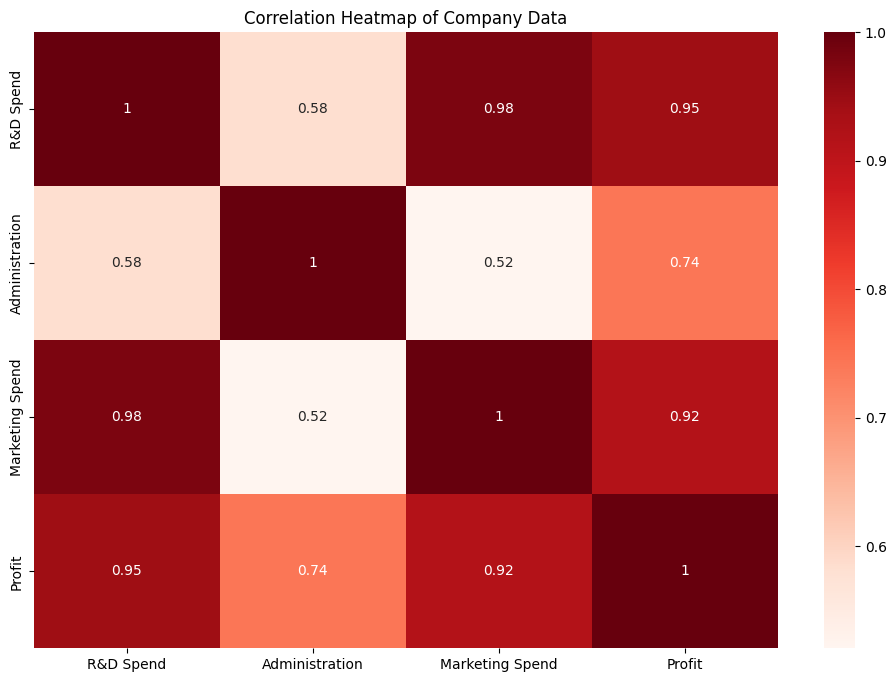

In [5]:
plt.figure(figsize= (12, 8))
sns.heatmap(makeshift_dataset.corr(), annot= True, cmap= "Reds")
plt.title("Correlation Heatmap of Company Data")
plt.show()

In [6]:
for column in ['State']:
  print(f"Unique values in {column}:", dataset[column].unique())

Unique values in State: ['New York' 'California' 'Florida']


In [7]:
State_dummies = pd.get_dummies(dataset['State'],prefix='State_')
dataset= pd.concat([dataset.drop("State", axis=1), State_dummies], axis=1)
State_dummies
dataset.replace(False,0,inplace= True)
dataset.replace(True, 1, inplace= True)

In [8]:
print(dataset.columns)

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State__California', 'State__Florida', 'State__New York'],
      dtype='object')


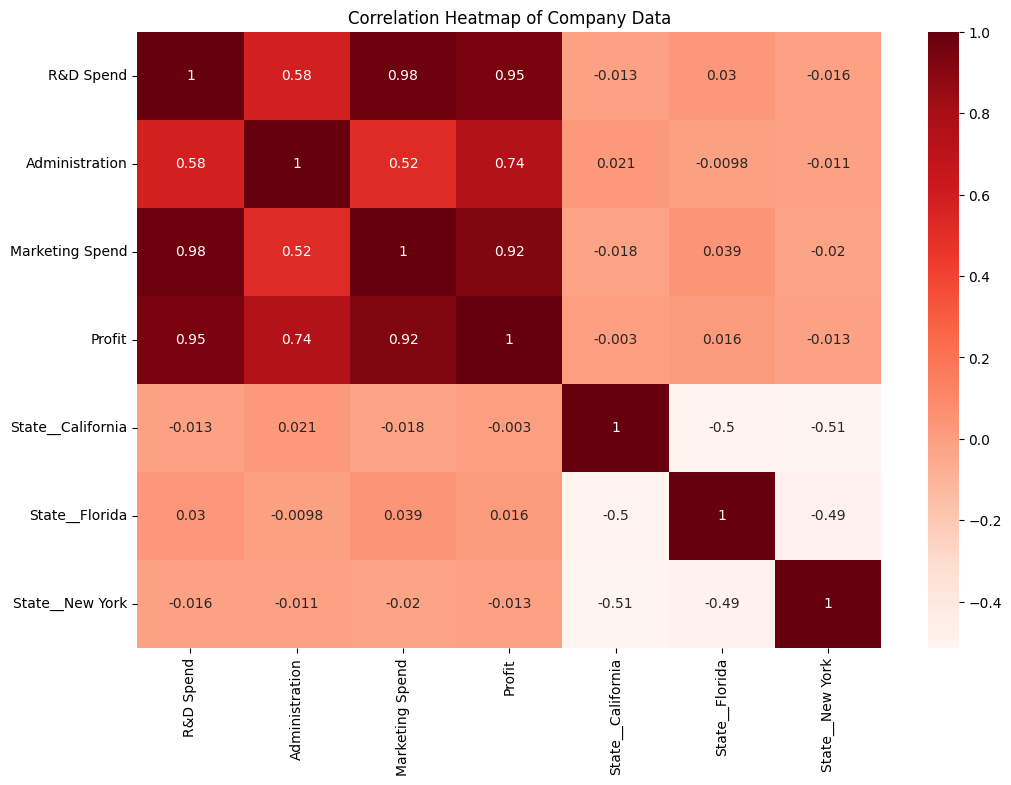

In [9]:
plt.figure(figsize= (12, 8))
sns.heatmap(dataset.corr(), annot= True, cmap= "Reds")
plt.title("Correlation Heatmap of Company Data")
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
features = ['R&D Spend', 'Administration', 'Marketing Spend',
       'State__California', 'State__Florida', 'State__New York']
target= ['Profit']

X= dataset[features]
Y= dataset[target]

X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=.2, random_state=0)

print(f'Training set size:  {X_train.shape[0]} samples')
print(f'Test set size:  {X_test.shape[0]} samples')

Training set size:  800 samples
Test set size:  200 samples


In [11]:
X_train_const= sm.add_constant(X_train)

model_fitted= sm.OLS(Y_train, X_train_const).fit()

print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     3672.
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        20:04:26   Log-Likelihood:                -8375.2
No. Observations:                 800   AIC:                         1.676e+04
Df Residuals:                     794   BIC:                         1.679e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.867e+04   2974.79

In [12]:
X_test_const= sm.add_constant(X_test)

test_predictions = model_fitted.predict(X_test_const)

test_predictions

993     89790.615329
859     88427.071874
298     94894.678370
553    175680.867256
672     83411.730421
           ...      
679    165897.619059
722    168655.486526
215    147009.668050
653    141396.221041
150    109086.506348
Length: 200, dtype: float64

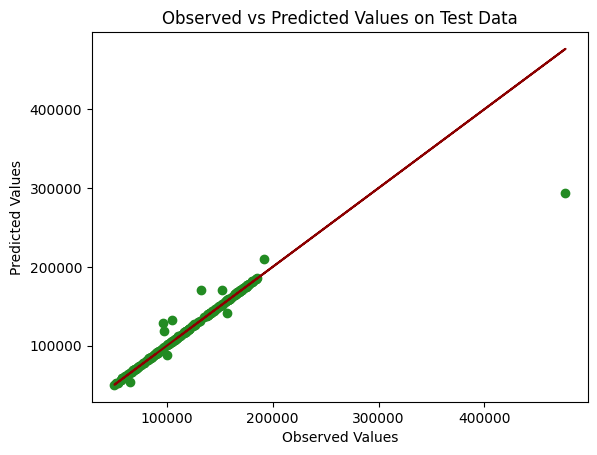

In [13]:
plt.scatter(Y_test, test_predictions, color= "forestgreen")
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(Y_test,Y_test, color= "darkred")
plt.show()

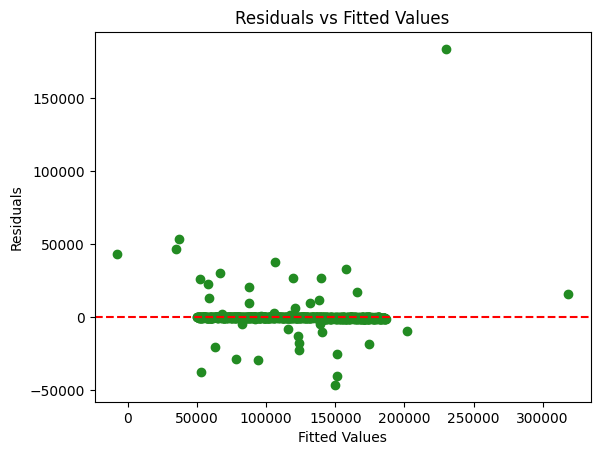

In [14]:
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color= "forestgreen")
plt.axhline(y=0, color="red", linestyle= '--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title('Residuals vs Fitted Values')
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

from sklearn.metrics import mean_squared_error
from math import sqrt

lr= LinearRegression()
lr.fit(X_train_scaled,Y_train)

Y_pred= lr.predict(X_test_scaled)

mse= mean_squared_error(Y_test, Y_pred)
rmse= sqrt(mse)

print(f'RMSE on Test set: {rmse}')

RMSE on Test set: 13861.74815148079


In [16]:
print(lr.coef_)
print()
print(lr.intercept_)

[[24443.81886125 10462.2688177   9827.3083124    247.98444839
   -168.87105514   -83.28715388]]

[118552.28426404]


In [17]:
import sympy as smp

In [18]:
b0,b1,b2,b3,b4,b5,b6,x1,x2,x3,x4,x5,x6= smp.symbols('b0 b1 b2 b3 b4 b5 b6 x1 x2 x3 x4 x5 x6', real=True)
f= b0+ b1*x1 + b2*x2+ b3*x3+ b4*x4+ b5*x5+ b6*x6
f

b0 + b1*x1 + b2*x2 + b3*x3 + b4*x4 + b5*x5 + b6*x6

In [19]:
f.subs([(b0,118552.28426404),(b1,24443.81886125),(b2,10462.2688177),(b3,9827.3083124),
       (b4,247.98444839),(b5,-168.87105514),(b6,-83.28715388)])

24443.81886125*x1 + 10462.2688177*x2 + 9827.3083124*x3 + 247.98444839*x4 - 168.87105514*x5 - 83.28715388*x6 + 118552.28426404

Where x1 through x6 are the features of the linear model.
Note: x4,x5,x6 can only be 0 or 1 because of the get dummies functionality. But, x1 through x3 can be any Real Number
